# Feature extraction on _Wet openbaarheid bestuur_ (Wob) decision letters

The aim of this study is to research and apply knowledge extraction methods for multiple features of the Wob decision letter. While the decision letters usually follow the same structure, there are some differences to be found. These differences are mainly due to administrative bodies varying in the way they draft these letters.

There are six features that are commonly found in the letters, namely: the document list, the relevant articles of law, the request of the applicant, the final decision by the administrative body, the date of the decision and the date of the request. These features each warrant their own way of extraction and method of evaluation. For example, the document list is often a table and can be extracted by algorithmic table detection. The articles of law, on the other hand, can be obtained by using rule-based text extraction. The request and decision parts of the letter can be extracted using text segmentation. Finally, the dates relating to the request, decision and proceedings can be obtained using named-entity recognition. Figure 1 shows an example of a standard Wob decision letter, with the features highlighted.

Julián Venhuizen (julian.venhuizen@student.uva.nl)

<figure style="margin-top: 20px;">
    <img src="img/Annotated Wob decision letter.png" alt="Wob decision letter (annotated)"/>
    <figcaption style="margin: 20px 60px; text-align: center;">
        <strong><em>Figure 1. An annotated Wob decision letter showing the features we want to extract. Red: date of decision. Orange: date of request. Yellow: request. Green: decision. Blue: articles of law. Purple: inventory table.</em></strong>
    </figcaption>
</figure>

In [1]:
import pandas as pd
import spacy
from nltk.corpus import stopwords

### Setting up variables
First, we load some variables that will be used throughout the extraction process. These are the Dutch stopwords from NLTK and the Dutch spaCy model.

For faster but less accurate results, the spaCy model could be changed to ```nl_core_news_sm```. More info can be found on https://spacy.io/models/nl.

In [2]:
stopwords = stopwords.words('dutch')
nlp = spacy.load('nl_core_news_lg')

Set the ```SCRIPTS``` variable to the location of the scripts, the ```DATA``` variable to the path of the test dataset and the ```GROUND_TRUTH``` variable to the csv file containing the ground truth.

In [3]:
SCRIPTS = './scripts'
DATA = './data/WooIR_clean'
GROUND_TRUTH = './data/GT/WooIR_clean.csv'

### Creating a dataframe of the TEST data

We first generate an index of the data, then we clean and filter the data using some predefined rules and finally we preprocess the data. During preprocessing, you can choose to turn on the classifier that only extracts the text and (possible) tables if the text percentage is above a certain threshold. Turning on the classifier does not impact the time of preprocessing.

Here we set the ```THRESHOLD``` for the percentage of text the document should contain. The default value is 3%.

In [4]:
THRESHOLD = 0.03

In [5]:
from scripts.collection import generate_index, filter_and_clean_index
from scripts.preparation import preprocess

df = generate_index(DATA)
df = filter_and_clean_index(df)
df = preprocess(df, classifier=True, threshold=THRESHOLD)
# display(df)

### Extracting the features
Then, we extract the features. We extract the decision date, the request date, the decision, the request, the articles of law and the table pages. The table pages are extracted twice: once using extra logic, once without.

In [6]:
from scripts.extraction import extract_features

df = extract_features(df, nlp)
# display(df)

### Evaluating and scoring the results
Finally we evaluate the dataframe. We do this by first loading the ground truth into a dataframe. The ground truth for WooIR was manually extracted from the test dataset.

In [7]:
gt = pd.read_csv(GROUND_TRUTH)
# display(gt)

When calculating the score, we can pass a name for the output folder and a name for the dataset. The output folder will be used to store the generated plots and the dataset name will be used in score report.

There are 0 non-Wob documents found, we remove those.
There are 0 (partly) image-based documents found, we remove those.
The final shape of the dataframe is: (30, 26)


##### SCORING THE DATES (WooIR*) #####
> The decision date:
We removed 0 records due to NaN values. We are left with 30 records.
The ACCURACY for the decision date is 96.67 %


> The request date:
We removed 0 records due to NaN values. We are left with 30 records.
The ACCURACY for the request date is 83.33 %


##### SCORING THE DECISION AND REQUEST (WooIR*) #####
> The decision:
We removed 0 records due to NaN values. We are left with 30 records.
The mean of the JACCARD SIMILARITY INDEX for the decision is 65.66 %


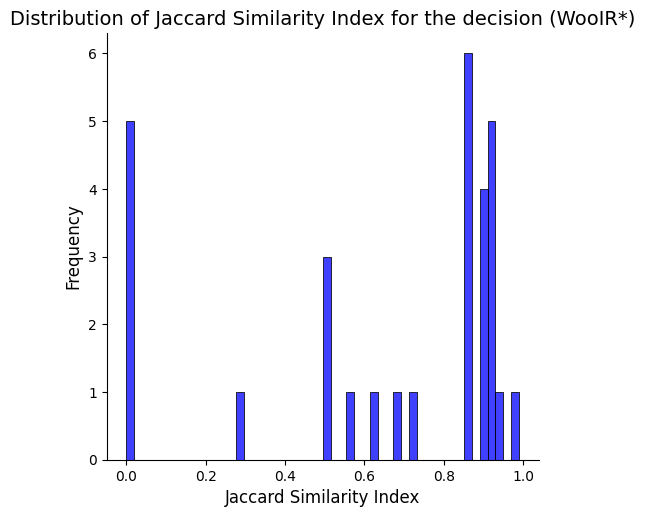



> The request:
We removed 0 records due to NaN values. We are left with 30 records.
The mean of the JACCARD SIMILARITY INDEX for the request is 37.47 %


<Figure size 640x480 with 0 Axes>

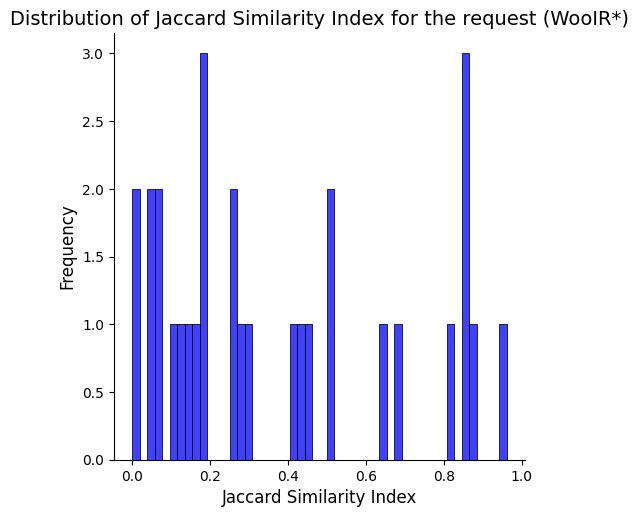



##### SCORING THE ARTICLES OF LAW (WooIR*) #####
We removed 5 records due to NaN values. We are left with 25 records.
The mean of the PRECISION for the articles of law is 85.96 %
The mean of the RECALL for the articles of law is 100.0 %
The mean of the F1 for the articles of law is 91.55 %


##### SCORING THE TABLES (WooIR*) #####
> With rules
We removed 19 records due to NaN values. We are left with 11 records.
The mean of the PRECISION for the tables is 54.55 %
The mean of the RECALL for the tables is 46.73 %
The mean of the F1 for the tables is 47.69 %


> Without rules
We removed 19 records due to NaN values. We are left with 11 records.
The mean of the PRECISION for the tables is 54.55 %
The mean of the RECALL for the tables is 55.82 %
The mean of the F1 for the tables is 49.2 %


<Figure size 640x480 with 0 Axes>

In [8]:
from scripts.evaluation import evaluate, score

ev = evaluate(df, gt, nlp, stopwords)
score(ev, output_folder='img', dataset='WooIR*')
# display(ev)